# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?appid=f420a60f6d0a21a7c37568b0bdd2a87f&q=detroit
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q="+ city
        # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        r = requests.get(city_url)
        data= r.json()

        # Parse the JSON and retrieve data
        city_weather = data["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"] - 273.15
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | tobelo
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | istgah-e rah ahan-e garmsar
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | christchurch
Processing Record 11 of Set 1 | nantucket
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | wewak
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | dryden
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | fort mcmurray
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']) 

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,21.69,98,40,3.09,US,1698595848
1,tobelo,1.7284,128.0095,26.55,79,86,0.38,ID,1698595849
2,edinburgh of the seven seas,-37.0676,-12.3116,11.23,66,21,10.66,SH,1698595849
3,port-aux-francais,-49.3500,70.2167,2.32,98,100,7.87,TF,1698595850
4,stanley,54.8680,-1.6985,9.33,95,75,3.09,GB,1698595850


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.69,98,40,3.09,US,1698595848
1,tobelo,1.7284,128.0095,26.55,79,86,0.38,ID,1698595849
2,edinburgh of the seven seas,-37.0676,-12.3116,11.23,66,21,10.66,SH,1698595849
3,port-aux-francais,-49.3500,70.2167,2.32,98,100,7.87,TF,1698595850
4,stanley,54.8680,-1.6985,9.33,95,75,3.09,GB,1698595850


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

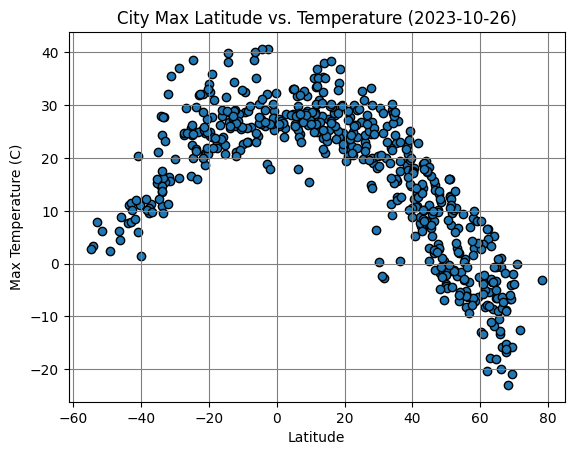

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-10-26)")
plt.grid(color='gray', linestyle='-')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

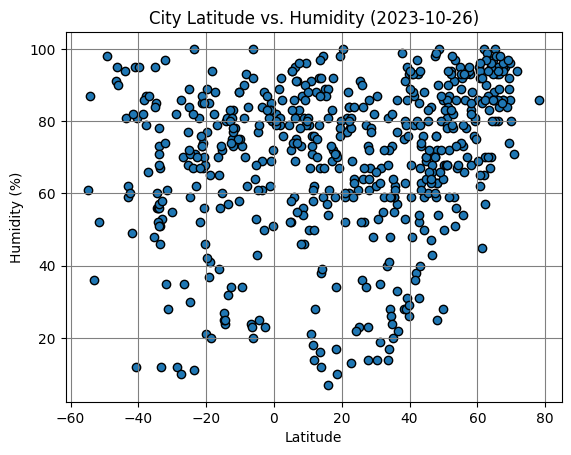

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-10-26)")
plt.grid(color='gray', linestyle='-')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

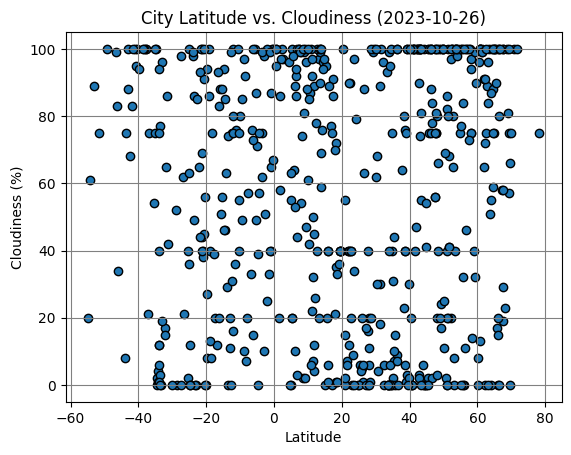

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-26)")
plt.grid(color='gray', linestyle='-')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

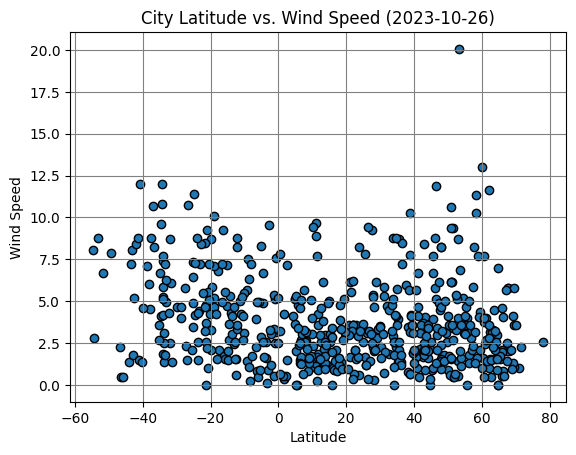

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2023-10-26)")
plt.grid(color='gray', linestyle='-')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plot_linregress(x_values, y_values, x_label, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r-value is: {r_value}")
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.69,98,40,3.09,US,1698595848
1,tobelo,1.7284,128.0095,26.55,79,86,0.38,ID,1698595849
4,stanley,54.8680,-1.6985,9.33,95,75,3.09,GB,1698595850
5,wailua homesteads,22.0669,-159.3780,21.44,84,40,3.60,US,1698595851
6,istgah-e rah ahan-e garmsar,35.2346,52.3094,22.85,20,2,1.35,IR,1698595851


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,11.23,66,21,10.66,SH,1698595849
3,port-aux-francais,-49.3500,70.2167,2.32,98,100,7.87,TF,1698595850
9,christchurch,-43.5333,172.6333,11.11,81,75,7.20,NZ,1698595635
12,wewak,-3.5534,143.6268,26.14,84,62,1.62,PG,1698595855
17,waitangi,-43.9535,-176.5597,7.68,94,8,1.37,NZ,1698595857


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8800301360864123


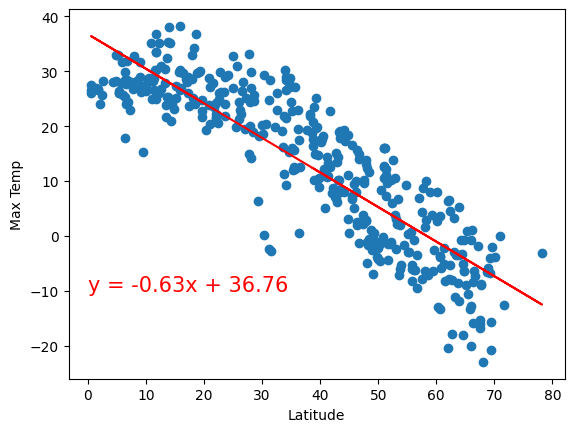

In [40]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", (0,-10))


The r-value is: 0.7355673926454972


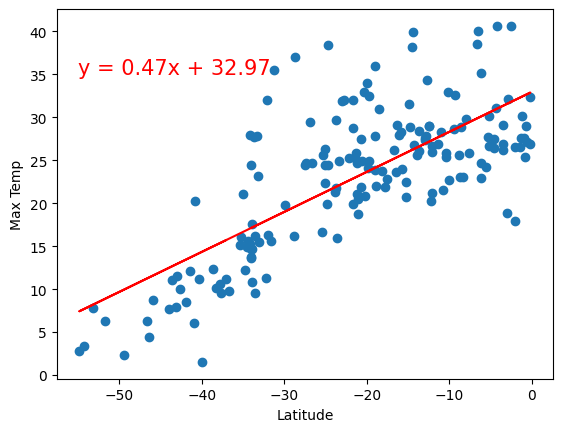

In [41]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", (-55,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2507246044532978


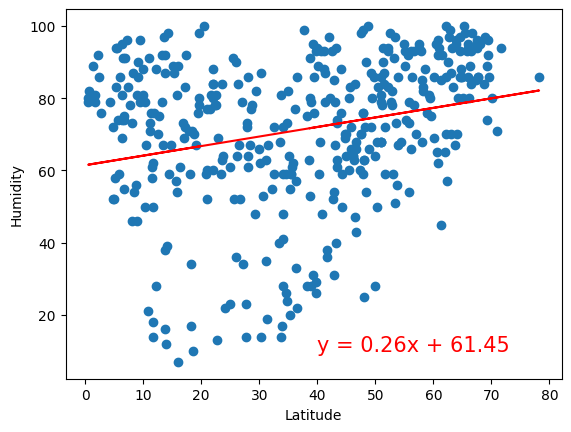

In [42]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", (40,10))

The r-value is: -0.02849733447007504


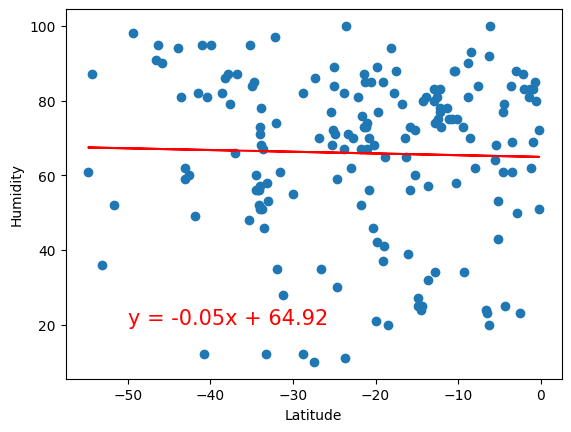

In [43]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09331793296430407


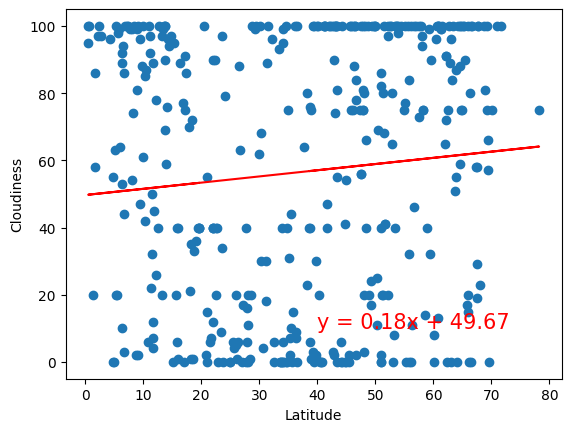

In [44]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (40,10))

The r-value is: 0.0009478475615157102


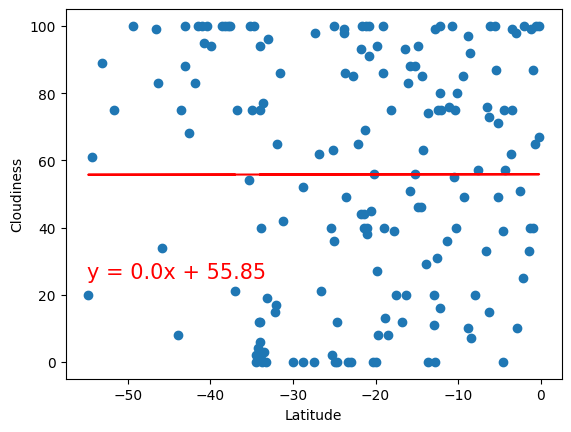

In [47]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (-55,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06652927620787631


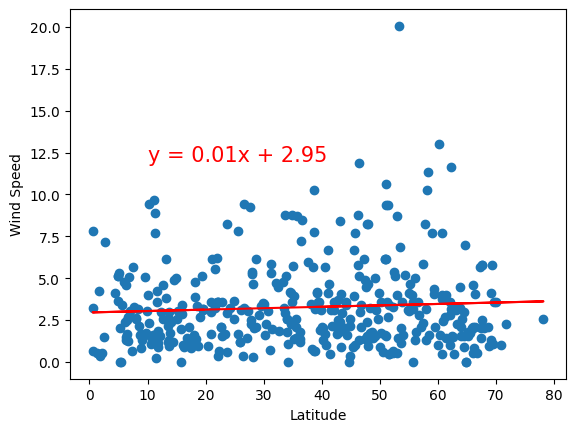

In [48]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (10,12))

The r-value is: -0.25769439562525587


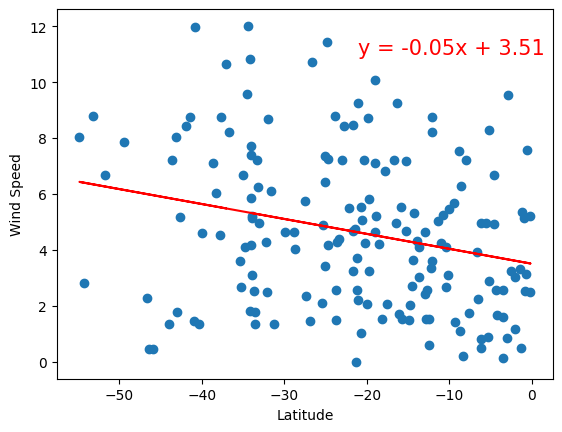

In [53]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (-21,11))

**Discussion about the linear relationship:** YOUR RESPONSE HERE